<h1> Problem 1 </h1>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [13]:
houseData = pd.read_csv('./train.csv')

In [14]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [16]:
houseDataNum = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [17]:
houseDataNum.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [18]:
houseDataNum.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


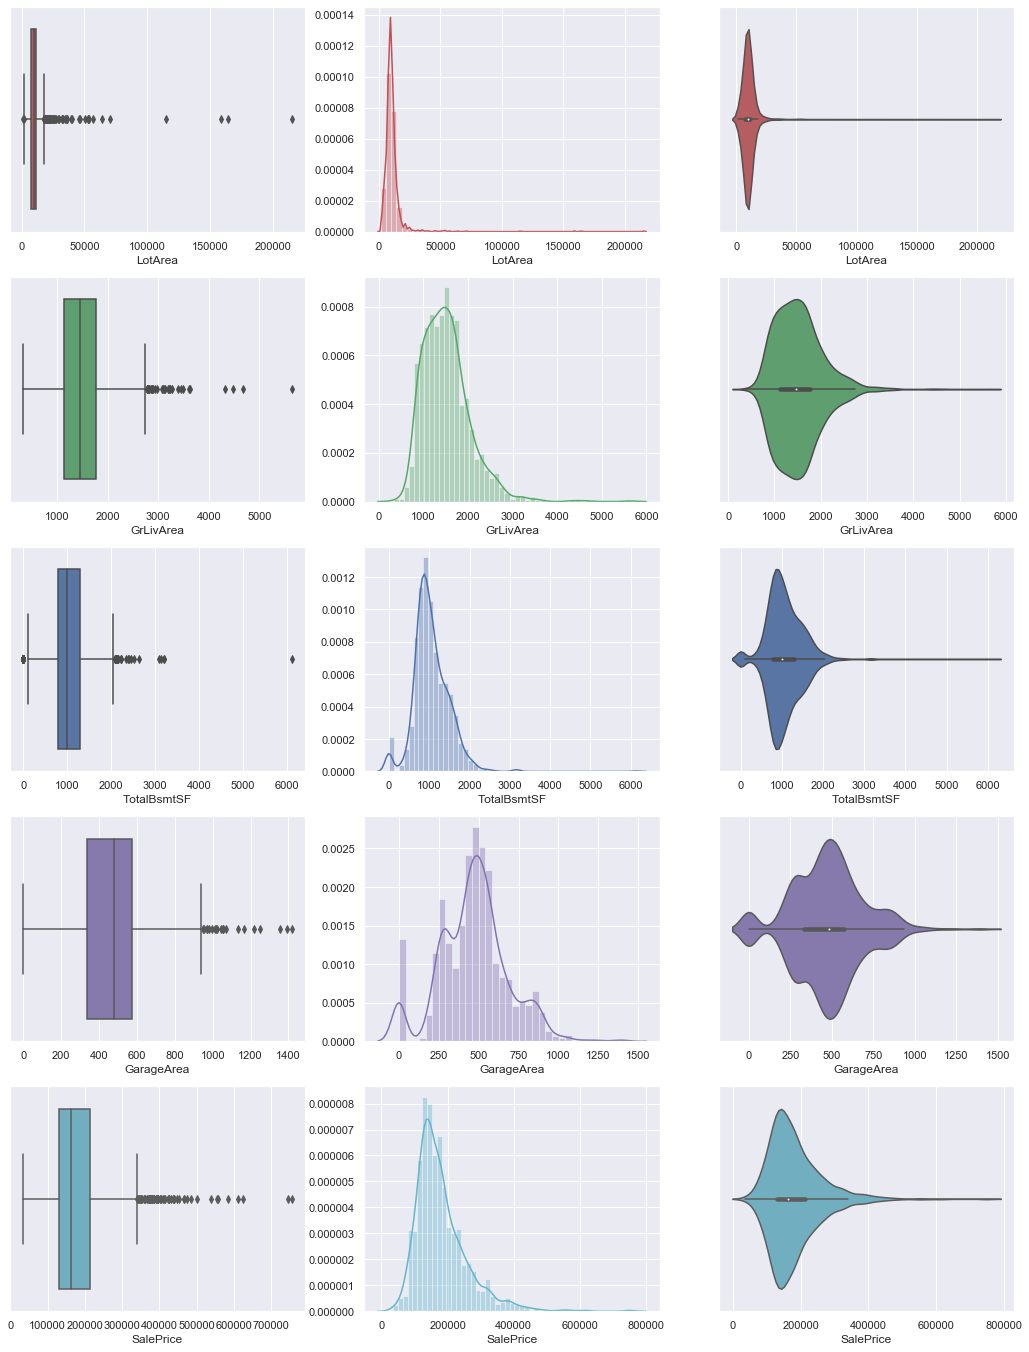

In [61]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in houseDataNum:
    sb.boxplot(houseDataNum[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(houseDataNum[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(houseDataNum[var], color = colors[count], ax = axes[count,2])
    count += 1

In [22]:
# which one has the maximum outliers

for var in houseDataNum:
    print(f'outliers in {var} : {len(houseDataNum[houseDataNum[var] > houseDataNum[var].mean() + 2*houseDataNum[var].std() ])}')

outliers in LotArea : 22
outliers in GrLivArea : 57
outliers in TotalBsmtSF : 38
outliers in GarageArea : 32
outliers in SalePrice : 63


              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


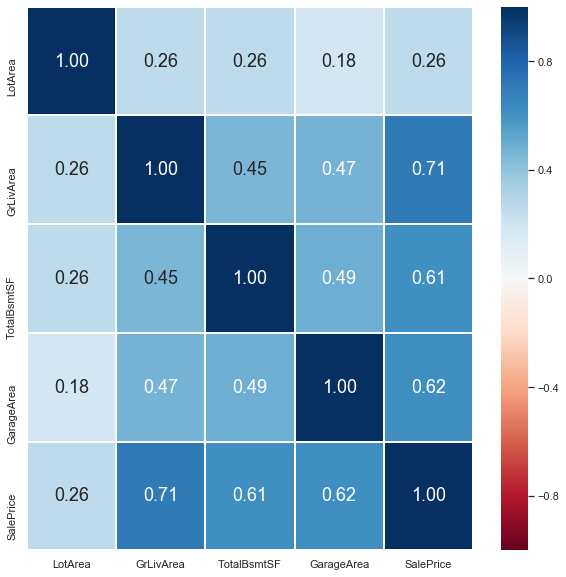

In [25]:
# Correlation Matrix
print(houseDataNum.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(houseDataNum.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

'LotArea'

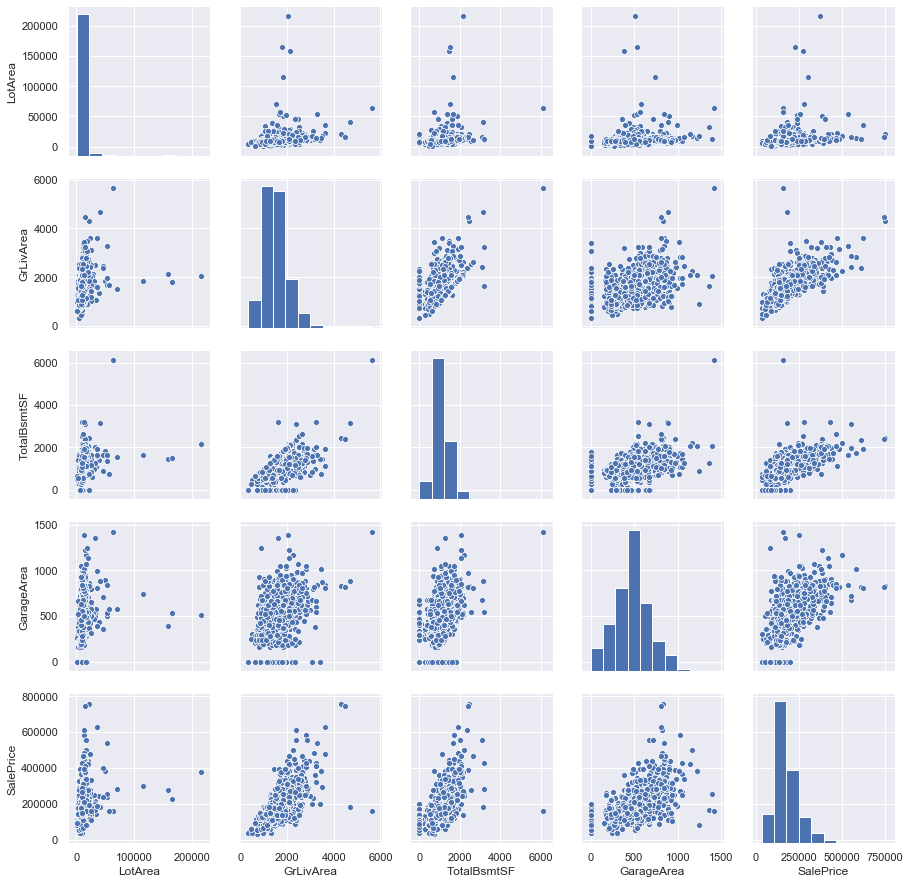

In [27]:
sb.pairplot(data = houseDataNum) # cannot see much the correlation between the two variables

# problem 2 (Categorical Variables)

In [41]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]) 

In [64]:
houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category')
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype('category')
houseCatData['BldgType'] = houseCatData['BldgType'].astype('category')
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype('category')


In [42]:
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [65]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass      1460 non-null category
Neighborhood    1460 non-null category
BldgType        1460 non-null category
OverallQual     1460 non-null category
dtypes: category(4)
memory usage: 7.9 KB


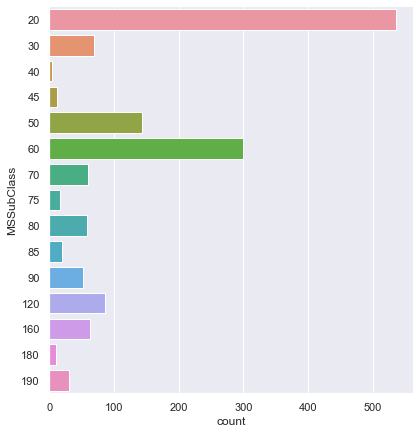

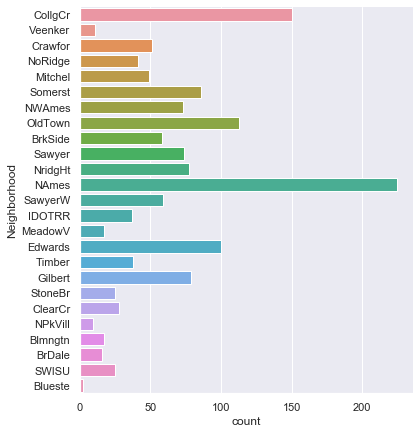

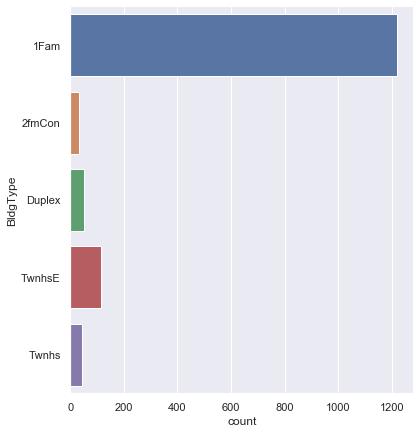

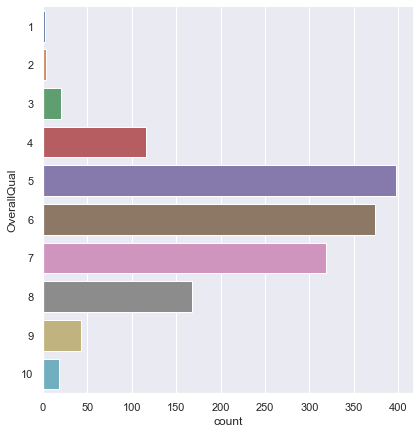

In [50]:
for var in houseCatData:
    sb.catplot(y = var, data = houseCatData, kind = "count", height = 6)

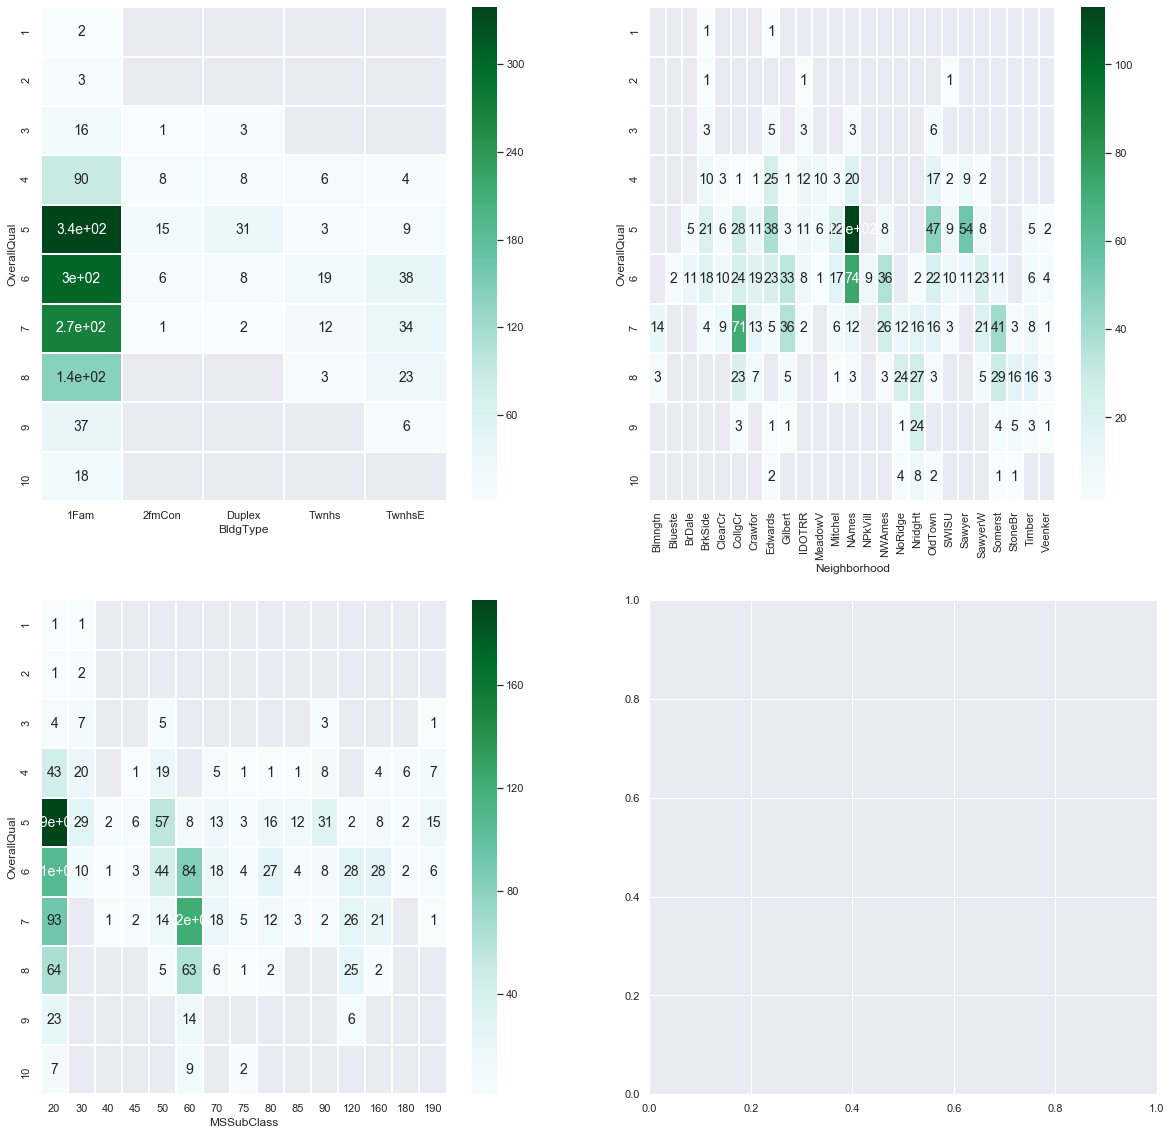

In [68]:
f, axes = plt.subplots(2, 2, figsize=(20, 20))

sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,0])
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[0,1])
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "BuGn", ax = axes[1,0])



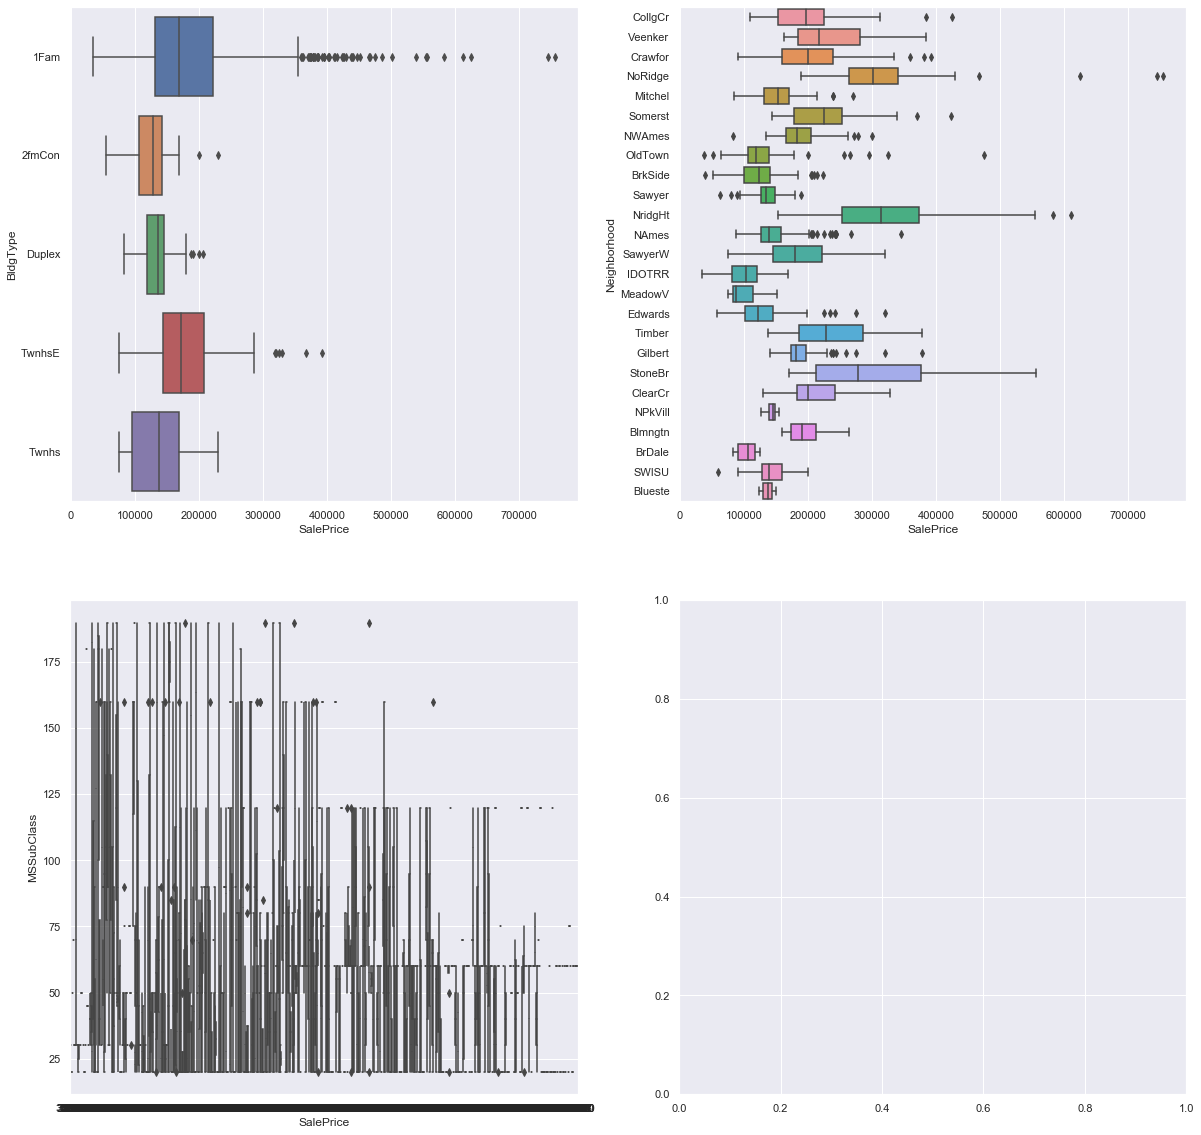

In [60]:
f, axes = plt.subplots(2, 2, figsize=(20, 20))


sb.boxplot(x = 'SalePrice', y = 'BldgType', data = houseData, ax=axes[0,0])
sb.boxplot(x = 'SalePrice', y = 'Neighborhood', data = houseData, ax=axes[0,1])
sb.boxplot(x = 'SalePrice', y = 'MSSubClass', data = houseData, ax=axes[1,0])

In [69]:
houseCatSale = pd.concat(['houseCatData','SalePrice'])

TypeError: cannot concatenate object of type "<class 'str'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid